<a href="https://colab.research.google.com/github/JisbethDiaz/ARCHIVOS-VARIOS/blob/Miner%C3%ADa-de-datos/Ejercicio_pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ÁRBOL DE DECISIÓN**

##Leyendo el archivo

In [152]:
import pandas as pd 
d = pd.read_csv('DATA.csv', encoding= 'unicode_escape') 
d1 = pd.read_csv('DATA_1.csv', encoding= 'unicode_escape')

Dimensiones de la tabla

In [153]:
d.shape

(54067, 17)

Identificando encabezado

In [154]:
d.columns

Index(['ID_Cliente', 'ID_Grupo', 'Ciclo', 'F_Inicio', 'Monto', 'Cuota',
       'Plazo', 'Sucursal', 'Nacionalidad', 'F_Nacimiento', 'Edad', 'Sexo',
       'Entidad_Nacimiento', 'Entidad_Residencia', 'CodigoPostal',
       'IngresoMensual', 'Liquido'],
      dtype='object')

##Identificando tipo de dato

In [155]:
d.dtypes

ID_Cliente              int64
ID_Grupo                int64
Ciclo                   int64
F_Inicio               object
Monto                   int64
Cuota                 float64
Plazo                   int64
Sucursal                int64
Nacionalidad           object
F_Nacimiento           object
Edad                  float64
Sexo                    int64
Entidad_Nacimiento    float64
Entidad_Residencia      int64
CodigoPostal          float64
IngresoMensual          int64
Liquido                object
dtype: object

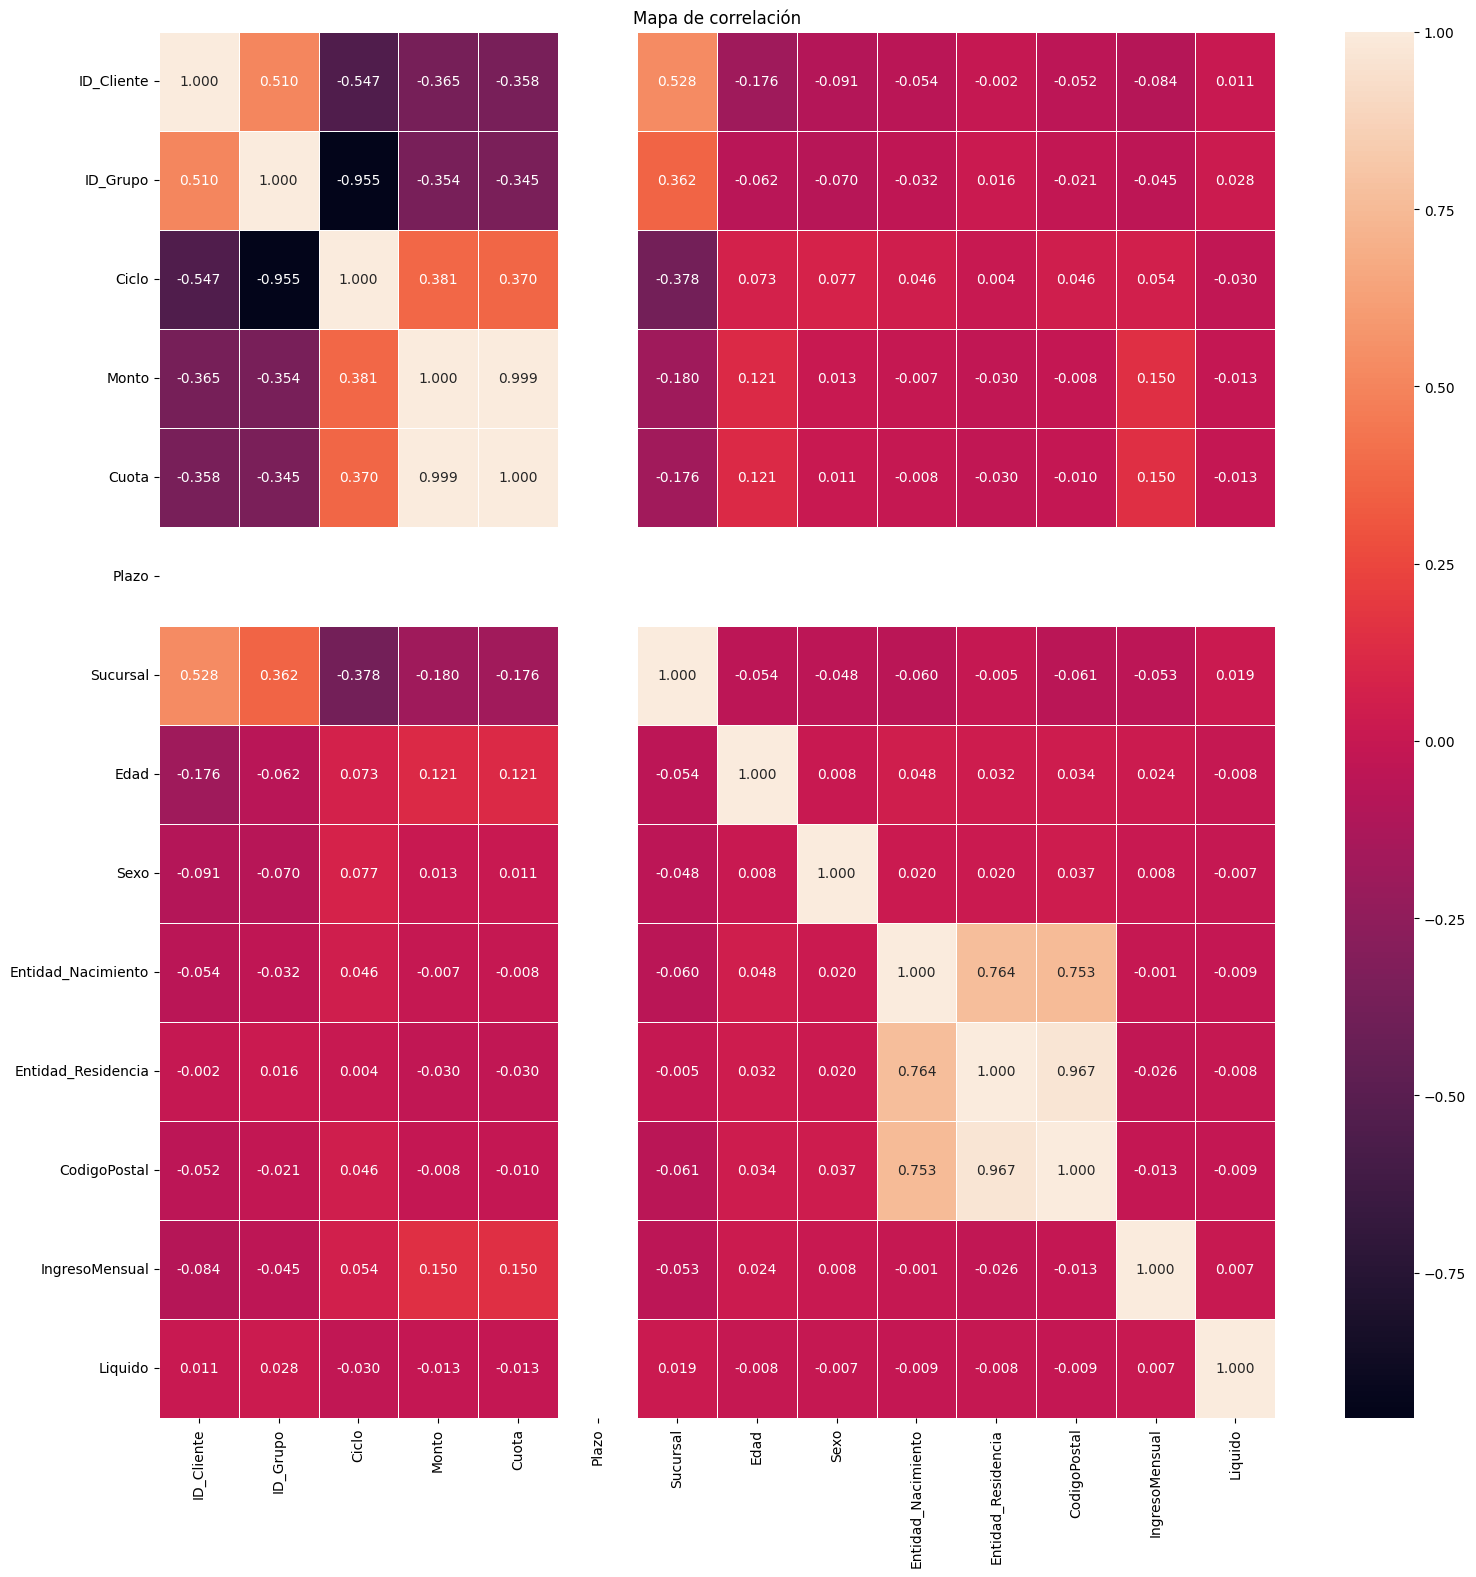

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(d1.corr(),annot= True,linewidths=0.5,fmt = ".3f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

In [157]:
nd= d[[ 'Ciclo', 'Monto', 'Cuota','Edad', 'Sexo', 'Entidad_Residencia',
        'IngresoMensual','IngresoMensual', 'Liquido']]  

In [158]:
nd= d[['ID_Cliente', 'ID_Grupo', 'Ciclo',  'Monto', 'Cuota', 'Sucursal', 'Edad', 'Sexo', 'CodigoPostal', 
       'Entidad_Nacimiento', 'Entidad_Residencia','Liquido']]  

In [159]:
nd.dtypes

ID_Cliente              int64
ID_Grupo                int64
Ciclo                   int64
Monto                   int64
Cuota                 float64
Sucursal                int64
Edad                  float64
Sexo                    int64
CodigoPostal          float64
Entidad_Nacimiento    float64
Entidad_Residencia      int64
Liquido                object
dtype: object

In [160]:
nd.isnull().any()

ID_Cliente            False
ID_Grupo              False
Ciclo                 False
Monto                 False
Cuota                 False
Sucursal              False
Edad                   True
Sexo                  False
CodigoPostal           True
Entidad_Nacimiento     True
Entidad_Residencia    False
Liquido               False
dtype: bool

In [161]:
nd = nd_drop = nd.dropna() # Con esta instrucción borramos las filas que contienen datos nulos

In [162]:
nd.isnull().any()

ID_Cliente            False
ID_Grupo              False
Ciclo                 False
Monto                 False
Cuota                 False
Sucursal              False
Edad                  False
Sexo                  False
CodigoPostal          False
Entidad_Nacimiento    False
Entidad_Residencia    False
Liquido               False
dtype: bool

## PROCESO

In [165]:
nd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54062 entries, 0 to 54066
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          54062 non-null  int64  
 1   ID_Grupo            54062 non-null  int64  
 2   Ciclo               54062 non-null  int64  
 3   Monto               54062 non-null  int64  
 4   Cuota               54062 non-null  float64
 5   Sucursal            54062 non-null  int64  
 6   Edad                54062 non-null  float64
 7   Sexo                54062 non-null  int64  
 8   CodigoPostal        54062 non-null  float64
 9   Entidad_Nacimiento  54062 non-null  float64
 10  Entidad_Residencia  54062 non-null  int64  
 11  Liquido             54062 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 5.4+ MB


In [166]:
#Variable predictora
x= nd.iloc[:,0:11]

#Variable a predecir
y = nd.iloc[:,11]

#Mostramos las primeras 5 filas
x.head()

,ID_Cliente,ID_Grupo,Ciclo,Monto,Cuota,Sucursal,Edad,Sexo,CodigoPostal,Entidad_Nacimiento,Entidad_Residencia
0,32147,91,40,79000,5490.48,70562,57.0,1,66056.0,19.0,19
1,32143,91,40,34000,2362.99,70562,57.0,1,66073.0,32.0,19
2,32154,91,40,70000,4864.98,70562,47.0,1,66056.0,19.0,19
3,32151,91,40,73000,5073.48,70562,47.0,1,66056.0,19.0,19
4,32159,91,40,16000,1112.00,70562,55.0,1,66056.0,19.0,19


Dividiendo nuestros datos en tablas




In [167]:
from sklearn.model_selection import train_test_split

#x_t y y_t para crear el modelo
#x_p y y_p para pruebar que tan bueno es el modelo
x_t, x_p, y_t, y_p = train_test_split(x,y,train_size=0.75,random_state=0)

In [168]:
x_t.info()
#Sexo 1-F  2-M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40546 entries, 39205 to 2732
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          40546 non-null  int64  
 1   ID_Grupo            40546 non-null  int64  
 2   Ciclo               40546 non-null  int64  
 3   Monto               40546 non-null  int64  
 4   Cuota               40546 non-null  float64
 5   Sucursal            40546 non-null  int64  
 6   Edad                40546 non-null  float64
 7   Sexo                40546 non-null  int64  
 8   CodigoPostal        40546 non-null  float64
 9   Entidad_Nacimiento  40546 non-null  float64
 10  Entidad_Residencia  40546 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


Creamos el modelo del árbol de decisión

#GRAFICANDO

### NOTAS: 
* Flechas a la izquierda son "Verdadero", y a la derecha "Falso"



In [169]:
from sklearn.tree import DecisionTreeClassifier

#max_depth = Niveles del arbol
arbol = DecisionTreeClassifier(max_depth=4)
#arbol = DecisionTreeClassifier()

#Modelo
#v. predictora , v a predecir
arbol_p = arbol.fit(x_t, y_t)


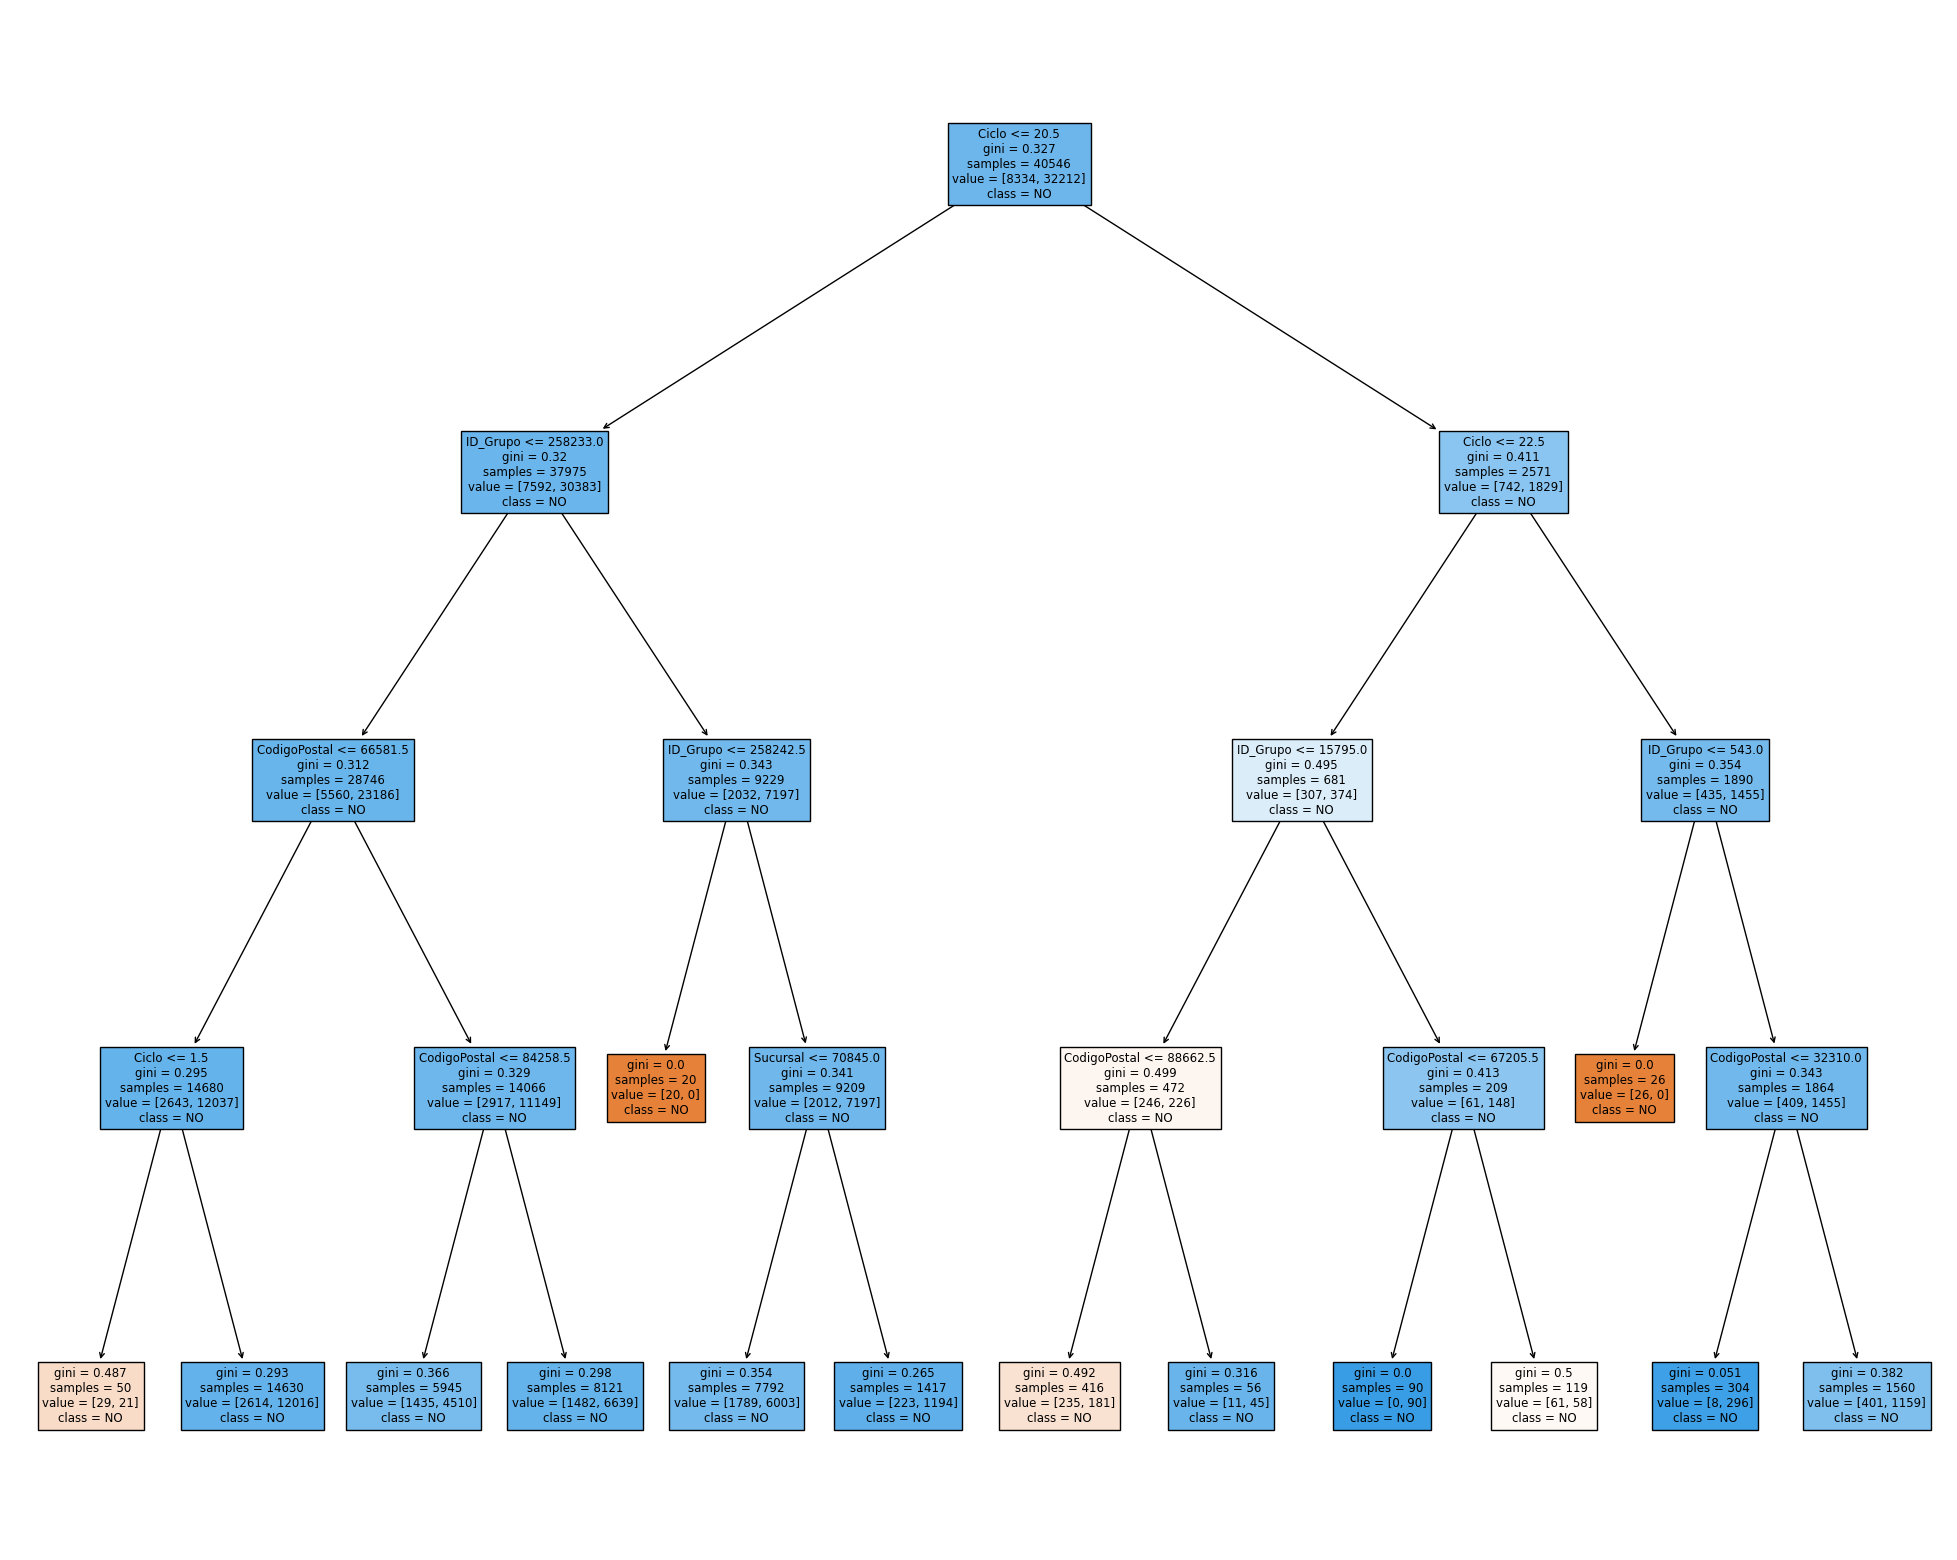

In [170]:
from matplotlib import pyplot as plt
from sklearn import tree

figura = plt.figure ( figsize=(25,20) )


tree.plot_tree( arbol_p, feature_names= list(x.columns.values),
               class_names= list(y.values), filled=True)


plt.show()

In [171]:
#¿Qué tan bueno es para predecir?
y_pred = arbol_p.predict(x_p)
y_pred

array(['SI', 'SI', 'SI', ..., 'SI', 'SI', 'SI'], dtype=object)

## Calculando precisión del modelo

In [172]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion: mc
mc = confusion_matrix(y_p, y_pred)
mc

array([[  124,  2661],
       [   79, 10652]])

*Matriz (valores reales en filas y en colunmnas valores predichos)
*Esto es 2785 individuos cuya clase es sí y 10731 cuya clase es no
*Pero al predecir se obtuvieron 2661 con Sí y 10652 con no
* Valores diagonales con predicción correcta (124 y 10652)
* Valores de diagonal inversa con predicción incorrecta (2661,79)

In [173]:
#Precisión global del modelo

import numpy as np   #Cálculos avanzados
pg = np.sum( mc.diagonal() ) / np.sum( mc )
pg

0.7972773009766203

In [174]:
#Precisión por clase
pres_si =  (mc[0,0]) / sum(mc[0,])
pres_si

0.04452423698384201

In [175]:
pres_no =  (mc[1,0]) / sum(mc[1,])
pres_no

0.0073618488491286925